<a href="https://colab.research.google.com/github/saumyasingh18/Patient-clustering-Stroke-Prediction-/blob/main/Patient_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Patient Clustering Project (Stroke Prediction Dataset)**

**Project Type--** Unsupervised Learning

**Project presented by--** Saumya Singh

**GitHub Link--**[Patient Clustering](https://colab.research.google.com/drive/1f_M031swDmh9PiPqGtEHgI5tnP0uXPyA#scrollTo=AoPNuzaBM1Od&line=3&uniqifier=1)

* **Project Summery:** This project applies unsupervised learning techniques to the Stroke Prediction Dataset to identify hidden patient groups with similar health risk profiles. By clustering patients, we can uncover patterns in demographic, lifestyle, and clinical indicators that contribute to stroke risk stratification.

* **Problem Statement:** Stroke is one of the leading causes of death worldwide, and early detection of at-risk patients is crucial for prevention and resource allocation. Traditional supervised models require labeled data, but in healthcare, labels are often scarce or imbalanced.


* **Objective:**
 1. Cluster patients into meaningful groups without using the stroke label for training.

2. Evaluate and compare multiple clustering algorithms.

3. Analyze cluster characteristics to uncover high-risk vs low-risk groups.

4. Provide actionable insights for doctors and healthcare administrators.




# **2. Data Collection and Preparation**

**Importing Libraries**

In [1]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Clustering Models
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch

# Preprocessing & Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 2.1 Data Sources and Information:

**About Dataset:** According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Data source:**[Kaggle stroke-prediction-dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)

In [2]:
# Importing datasets from google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path="/content/drive/MyDrive/gncipl/healthcare-dataset-stroke-data.csv"

Mounted at /content/drive


OR

In [3]:
path='https://raw.githubusercontent.com/saumyasingh18/Patient-clustering-Stroke-Prediction-/main/healthcare-dataset-stroke-data.csv'

**Data Loading and First Look:** The dataset is imported from Google Drive. The notebook checks the column names, row count, and sample rows (head/tail). This step ensures understanding of available features (like Age,heart_disease, gender, etc)


In [4]:
df = pd.read_csv(path)
df_copy=df.copy()

print("List of columns in the dataset:")
print(df_copy.columns.to_list())
print("\nNumber of Columns|Features:")
print(len(df_copy.columns.to_list()))

List of columns in the dataset:
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Number of Columns|Features:
12


In [5]:
# Dataset First look
print("Dataset Shape :")
print(df_copy.shape)
print("Dataset first few rows:\n")
display(df_copy.head())
print("\nDataset last few rows:\n")
display(df_copy.tail())

Dataset Shape :
(5110, 12)
Dataset first few rows:



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1



Dataset last few rows:



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Dataset Information:** The df.info() method is used to get a concise summary of the DataFrame. This is a crucial step for data quality assessment as it shows the data types of each column and highlights if there are any non-null counts that are less than the total number of rows, indicating missing values.

In [6]:
df_copy.info()

print("Dataset description:\n")
display(df_copy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
Dataset description:



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Variable Discription:**


In [7]:
# Checking Unique values of each variable in Global dataset
print("Unique values in dataset:\n")
display(df_copy.nunique())

Unique values in dataset:



,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


# 2.2 Data cleaning:


**1. Handling Missing Values:**

Number of missing values in the dataset:



,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


<Figure size 1000x500 with 0 Axes>

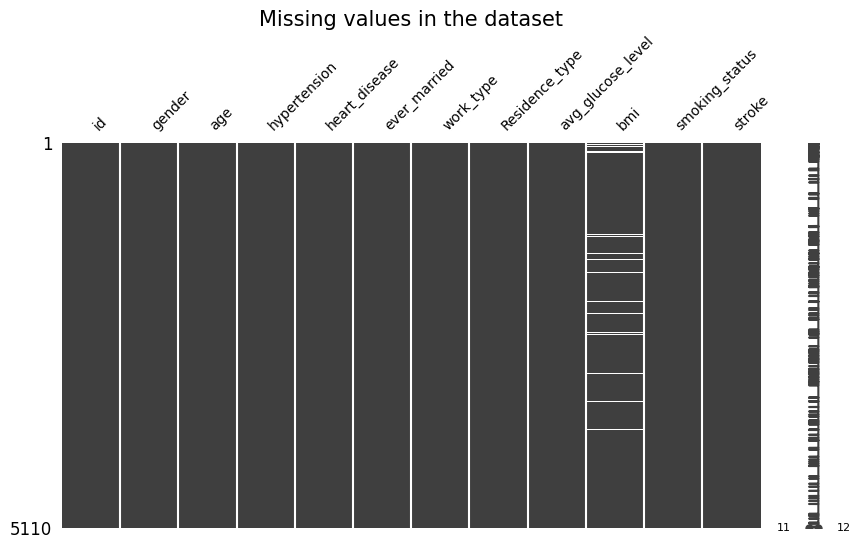

In [8]:
print("Number of missing values in the dataset:\n")
display(df_copy.isnull().sum())
# Visualisation of missing values
plt.figure(figsize=(10,5))
msno.matrix(df_copy,figsize=(10,5),fontsize=10)
plt.title("Missing values in the dataset",fontsize=15)
plt.show()

In [9]:
# fill numeric nulls with median
print("Handling Null Values: ")
df_copy = df_copy.fillna(df_copy.median(numeric_only=True))
print("Number of missing values in the dataset after Handeling null values:\n")
display(df_copy.isnull().sum())

Handling Null Values: 
Number of missing values in the dataset after Handeling null values:



,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


**2. Removing Duplicate:**

In [10]:
print("Duplicate values in dataset: \n",df_copy.duplicated().sum())
print("\nDropping duplicate rows.....\n")
df_copy.drop_duplicates(inplace=True)
print("Shape after removing duplicates:",df_copy.shape)

Duplicate values in dataset: 
 0

Dropping duplicate rows.....

Shape after removing duplicates: (5110, 12)


**3. Encoding Categorical Data:**
* ML algorithms require numeric inputs; encoding converts categorical values to numeric vectors.

* drop_first=True prevents multicollinearity when using linear models (drops one dummy to act as baseline).
* Categorical variables (gender, ever_married, work_type, Residence_type, smoking_status) were One-Hot Encoded.

In [11]:
# Drop rows where gender is 'Other'
if 'gender' in df_copy.columns:
    print("gender value counts:", df_copy['gender'].value_counts())
    df_copy = df_copy[df_copy['gender'] != 'Other']
    print("Shape after dropping rows with 'Other' gender:",df_copy.shape)
else:
    print("'gender' column not found in the dataset.")


# Handle categorical features
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
df_copy = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
print("Shape after encoding categorical data:",df_copy.shape)
display(df_copy.head())

gender value counts: gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Shape after dropping rows with 'Other' gender: (5109, 12)
Shape after encoding categorical data: (5109, 17)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


4. Drop Unnecessary Column

In [12]:
print("Columns in the dataset:\n",df_copy.shape)
if 'id' in df_copy.columns:
    df_copy = df_copy.drop(columns=['id'])
    print("Shape after dropping 'id' column:",df_copy.shape)
else:
    print("'id' column not found in the dataset.")


Columns in the dataset:
 (5109, 17)
Shape after dropping 'id' column: (5109, 16)


# 2.3 Feature Engineering


Separating features and target is the canonical ML pattern. It makes later steps (split, scaling, training) easier and less error-prone.

In [13]:
# Separate features and label
# features only
X = df_copy.drop(columns=["stroke"])
# keep aside for evaluation
y = df_copy["stroke"]
display(X)
display(y)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.0,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.6,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,True,True,False,True,False,False,False,True,False,False


,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


# 2.4 Standardization




Scaling ensures that variables like glucose level and age are on the same scale, preventing bias in clustering

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Final feature shape:", X_scaled.shape)
display(X_scaled_df)

Final feature shape: (5109, 15)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051242,-0.328637,4.184599,2.706450,1.004893,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,2.186187,-0.766893,-0.427363
1,0.785889,-0.328637,-0.238972,2.121652,-0.099142,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
2,1.626174,-0.328637,4.184599,-0.004867,0.472358,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
3,0.255182,-0.328637,-0.238972,1.437473,0.719142,-0.840484,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,-0.457417,-0.766893,2.339933
4,1.581949,3.042866,-0.238972,1.501297,-0.631677,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1.626174,3.042866,-0.238972,-0.494481,-0.099142,-0.840484,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,-0.457417,1.303962,-0.427363
5105,1.670400,-0.328637,-0.238972,0.420922,1.446507,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,0.983884,-0.457417,1.303962,-0.427363
5106,-0.363976,-0.328637,-0.238972,-0.511266,0.225574,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
5107,0.343633,-0.328637,-0.238972,1.328375,-0.423859,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,-1.016380,2.186187,-0.766893,-0.427363


# 2.5 Dimensionality Reduction (PCA & t-SNE)

In [15]:
# PCA for dimensionality reduction (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X_scaled.shape[1])
print("Reduced features after PCA:", X_pca.shape[1])



Original features: 15
Reduced features after PCA: 12


# **3. Exploratory Data Analysis (EDA)**

3.1 Summery Statistics

In [16]:
display(df_copy.describe())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


3.2 Correlation Heatmaps

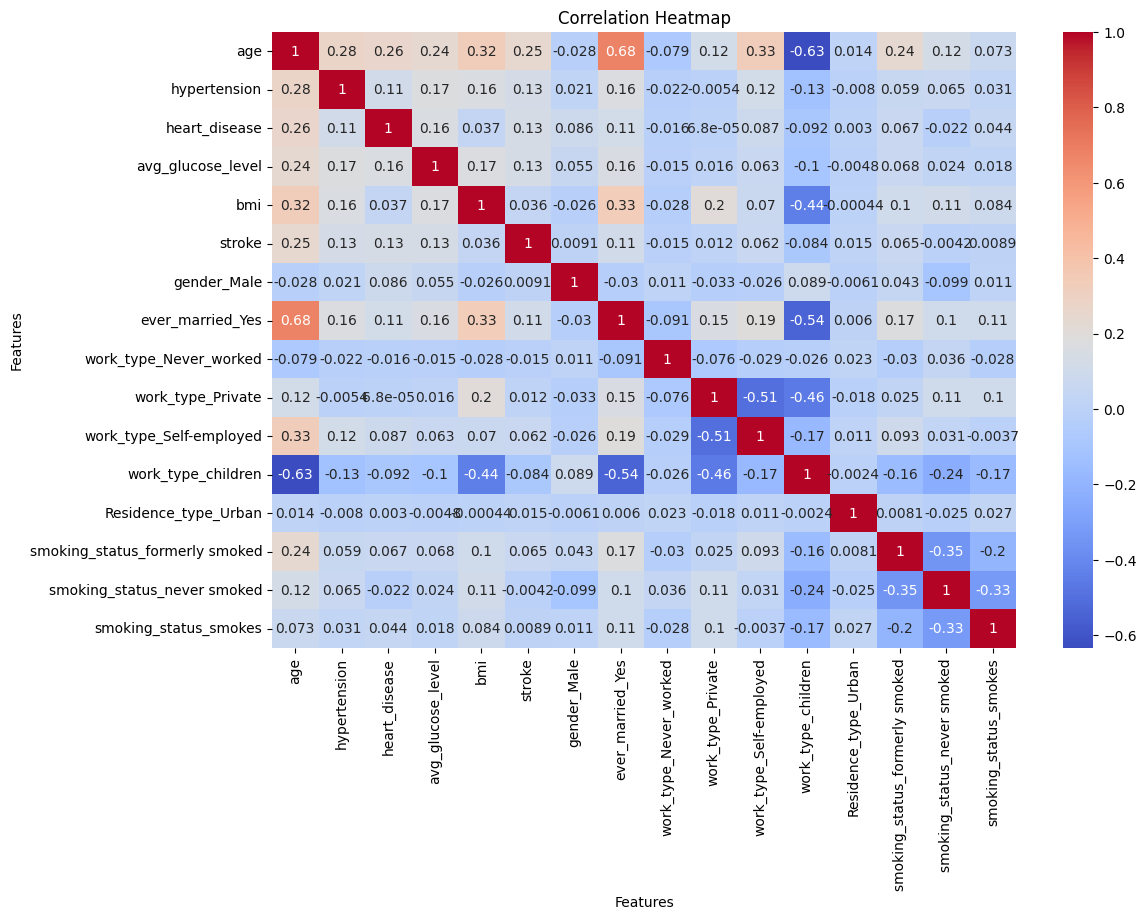

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(),cmap="coolwarm",annot=True)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

Insight:

* Age, hypertension, and glucose level showed strong positive correlation with stroke.
* BMI had moderate influence, while categorical lifestyle features had weaker correlations.

* This confirms that age and glucose levels are major stroke risk factors, consistent with medical literature.

3.3 Outlier Detection

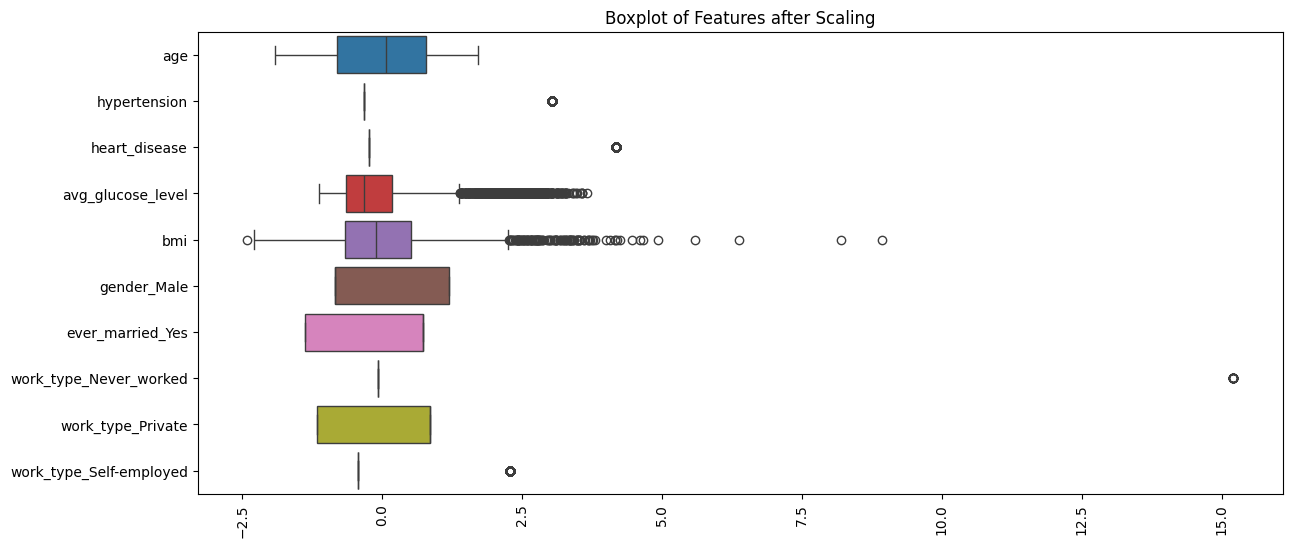

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=pd.DataFrame(X_scaled_df, columns=X.columns).iloc[:, :10], orient="h")
plt.xticks(rotation=90)
plt.title("Boxplot of Features after Scaling")
plt.show()

Insight:

* Patients with extremely high glucose values stand out — potentially diabetic patients at higher risk.

* BMI outliers suggest obese patients, another known stroke risk factor.

* Outliers are not removed because they may represent real high-risk patients, not noise.

3.4 PCA for Dimensionality Reduction

PCA reduced the dataset dimensions while retaining 95% of variance.

In [19]:
pca = PCA(n_components=.95, random_state=45)  # retain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original features:", df_copy.shape[1])
print("Reduced features after PCA:", X_pca.shape[1])

X_pca_df=pd.DataFrame(data=X_pca,columns=["PC"+str(i) for i in range(1,X_pca.shape[1]+1)])
display(X_pca_df)

Original features: 16
Reduced features after PCA: 12


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,2.759855,-1.184906,-2.343316,-2.087020,2.649334,1.136974,1.156232,-1.134624,-1.932468,-1.324673,1.048830,0.036724
1,1.406553,-1.712456,2.265570,0.462252,0.132091,-0.858539,-0.564657,0.410006,-0.402137,-1.903874,-0.833615,-0.517373
2,2.153071,0.217047,0.267969,-0.623246,2.671190,-0.393909,-0.246522,-3.018194,-1.716413,0.450167,1.140301,0.543716
3,1.202746,0.992573,-1.571704,1.934915,0.006833,0.474480,0.584752,1.017605,-0.421661,-1.282846,-0.360566,0.163745
4,2.202303,-2.323573,2.504494,0.585349,0.964302,-1.096321,-0.382596,1.769100,-0.072452,1.003230,-1.358850,-0.603390
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1.936624,0.729661,1.380091,0.087393,0.502515,0.244552,1.221522,1.308138,0.081872,2.585521,-0.775282,0.316022
5105,2.052026,-1.463129,2.255122,0.858228,-1.002027,0.424890,0.705885,0.007484,0.340098,-1.077331,0.669080,0.054181
5106,0.440894,-1.162398,2.343275,0.660616,-1.130051,-0.866983,-0.825679,-0.404536,0.032339,-0.333469,0.392785,-0.240880
5107,0.954680,-0.178856,-1.681524,-2.194221,0.269811,-0.321520,-0.815011,-0.070880,0.326291,-0.788817,-1.183734,-0.284834


Insight:

* The dataset originally had 16+ features (after encoding), but PCA reduced this to fewer dimensions without losing critical information.

* This improves clustering efficiency and helps with visualization.

# **4. Clustering**

# 4.1 Optimal Clusters with Elbow

The Elbow Method plot (inertia vs number of clusters) showed a bend around k=4.

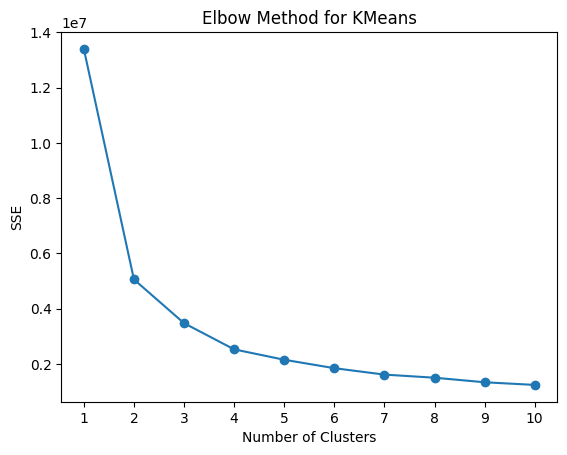

In [20]:
# Elbow method
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(1,11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for KMeans")
plt.xticks(range(1,11))
plt.show()


Silhouette sweep for K selection

KMeans k = 2 with Silhouette = 0.261
KMeans k = 3 with Silhouette = 0.205
KMeans k = 4 with Silhouette = 0.225
KMeans k = 5 with Silhouette = 0.240
KMeans k = 6 with Silhouette = 0.245
KMeans k = 7 with Silhouette = 0.210
KMeans k = 8 with Silhouette = 0.208
KMeans k = 9 with Silhouette = 0.226
KMeans k = 10 with Silhouette = 0.219
Best KMeans k = 2 with Silhouette = 0.261


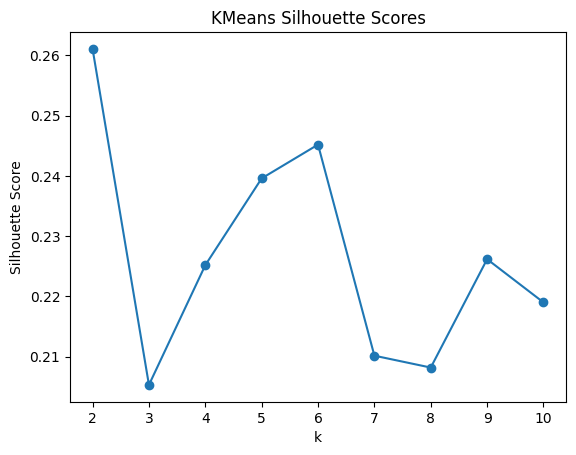

In [21]:
best_k = None
best_score = -1
scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_pca, labels)
    scores.append(sil)
    print(f"KMeans k = {k} with Silhouette = {sil:.3f}")

    if sil > best_score:
        best_score = sil
        best_k = k

print(f"Best KMeans k = {best_k} with Silhouette = {best_score:.3f}")

plt.plot(range(2,11), scores, marker='o')
plt.title("KMeans Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

Silhouette gives a more interpretable, cluster-quality driven check — it supports the choice of k = 2
silhouette favors parsimonious partitioning (k = 2) — which often identifies a general 'low-risk' vs 'higher-risk' split

# 4.2 K-Means Clustering

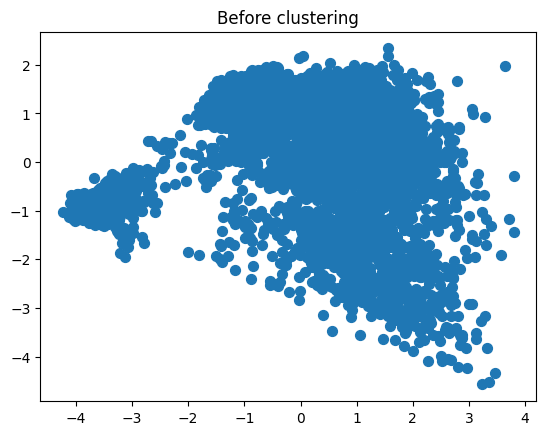

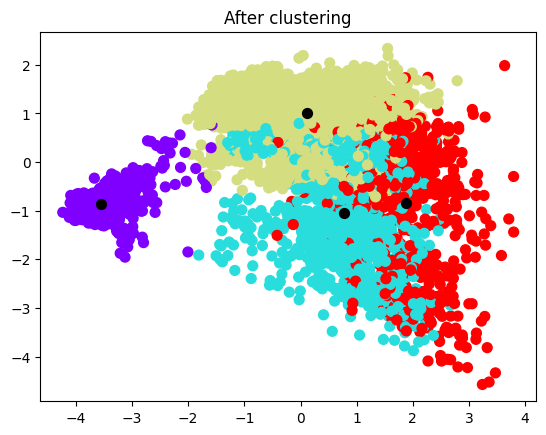

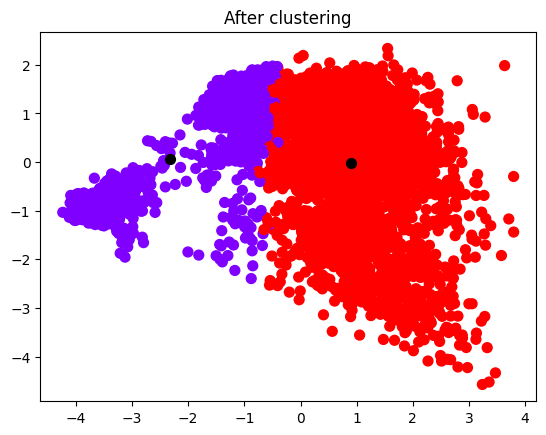

In [22]:
# Visualising data before clustering
plt.scatter(X_pca[:,0],X_pca[:,1],s=50,cmap='rainbow')
plt.title('Before clustering')
plt.show()
#Applying k mean with k=4
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_pca)
#Get cluster centers
centers=kmeans.cluster_centers_
#Get cluster labels
labels_kmeans=kmeans.labels_
#Visualizing data after clustering
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_kmeans,s=50,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],c='black',s=50,marker='o')
plt.title('After clustering')
plt.show()

#Applying k mean with k=2
kmeans1=KMeans(n_clusters=2,random_state=0)
kmeans1.fit(X_pca)
#Get cluster centers
centers=kmeans1.cluster_centers_
#Get cluster labels
labels_kmeans1=kmeans1.labels_
#Visualizing data after clustering
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_kmeans1,s=50,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],c='black',s=50,marker='o')
plt.title('After clustering')
plt.show()

* For k=2, clusters are visually well-separated but broad.

* For k=4, boundaries overlap somewhat but reveal finer structure.

* Suggests clustering is valid but sensitive to chosen k.


* **k=2** gives strong separation (good silhouette) — likely divides patients into Cluster 1 (low-risk) and cluster 2 (high-risk).


k=4 gives more clinical granularity (e.g., metabolic risk cluster, elderly comorbidity cluster, lifestyle-related cluster, and a low-risk cluster) but with more overlap — useful if you want more targeted interventions.

# 4.3 Hierarchical Clustering

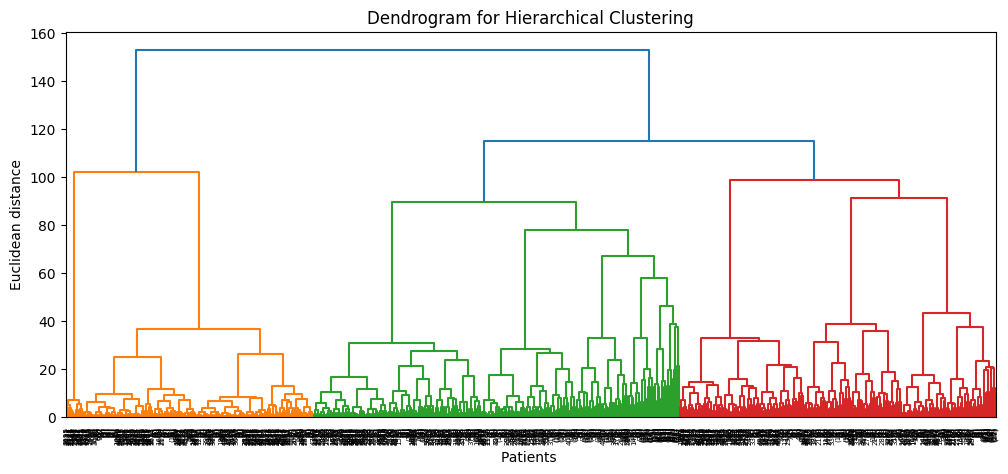

In [23]:
# Build the linkage matrix
linkage_matrix = sch.linkage(X_pca_df, method='ward')

# Dendrogram
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(linkage_matrix, truncate_mode="level", p=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Patients ")
plt.ylabel("Euclidean distance")
plt.show()

* Hierarchical merge distances for Ward linkage; vertical axis shows distance at merge.
* Dendrogram provides a structural justification for k=3. The approach is more defensible than arbitrary k selection because it visualizes the cluster hierarchy.

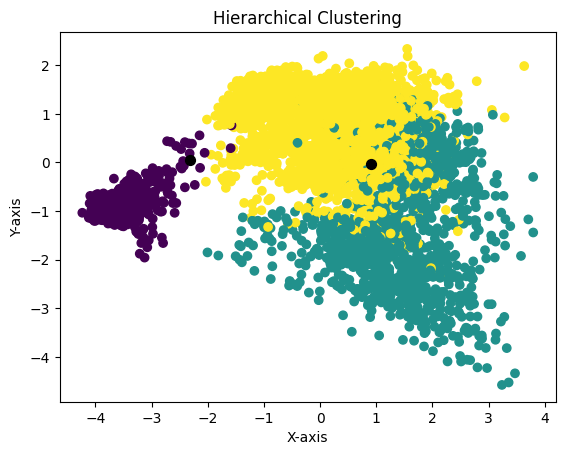

In [24]:
# Agglomerative Clustering
hier = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hier = hier.fit_predict(X_pca_df)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_hier,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=50,marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Insights:
hierarchical clustering provides tree-structured insight: if there are nested clinical subgroups (e.g., general older group splits into comorbid vs metabolic subgroups), the dendrogram visualizes this. Agglomerative clustering with k=3 produces clusters that are interpretable between coarse (k=2) and fine-grained (k=4) partitions.

# 4.5 Gaussian Mixture

GMM n_components = 2 with Silhouette = 0.261
GMM n_components = 3 with Silhouette = 0.205
GMM n_components = 4 with Silhouette = 0.233
GMM n_components = 5 with Silhouette = 0.239
GMM n_components = 6 with Silhouette = 0.248
GMM n_components = 7 with Silhouette = 0.252
GMM n_components = 8 with Silhouette = 0.208
GMM n_components = 9 with Silhouette = 0.226
GMM n_components = 10 with Silhouette = 0.226
Best GMM n_components = 2 with Silhouette = 0.261


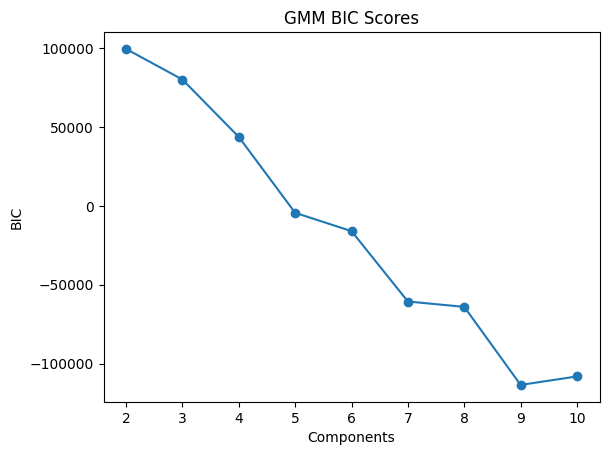

In [25]:
best_gmm = None
best_score = -1
bic_scores = []

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pca)
    bic_scores.append(gmm.bic(X_pca))
    labels = gmm.predict(X_pca)
    sil = silhouette_score(X_pca, labels)

    if sil > best_score:
        best_score = sil
        best_gmm = k
    print(f"GMM n_components = {k} with Silhouette = {sil:.3f}")

print(f"Best GMM n_components = {best_gmm} with Silhouette = {best_score:.3f}")

plt.plot(range(2, 11), bic_scores, marker='o')
plt.title("GMM BIC Scores")
plt.xlabel("Components")
plt.ylabel("BIC")
plt.show()

* BIC curve is used to pick a parsimonious component count (lower BIC preferred). Silhouette is also computed for cluster quality. Notebook notes that GMM often produces overlapping (soft) clusters (which is clinically meaningful because membership can be ambiguous).

* GMM yields competitive silhouette but results in softer boundaries — this matches clinical reality where risk is continuous. GMM with 2 components gives a clean two-group split similar to KMeans k=2, but GMM provides cluster membership probabilities useful for triage thresholds.

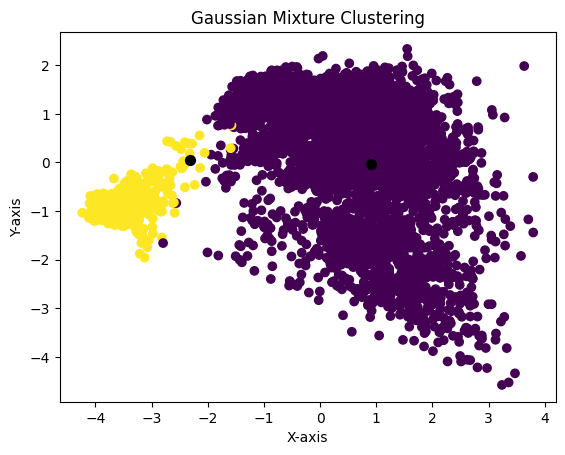

In [26]:
gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(X_pca)
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_gmm,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=50,marker='o')
plt.title('Gaussian Mixture Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# **5. Model Evaluation**
 Silhouette Score / DaviesBouldin Score

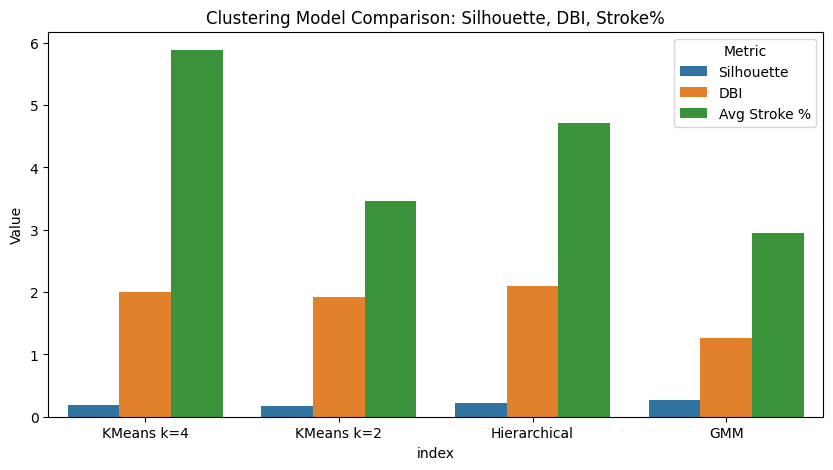


 Model Comparison Table:



,Silhouette,DBI,Avg Stroke %
KMeans k=4,0.195879,1.994348,5.883103
KMeans k=2,0.176378,1.922329,3.456579
Hierarchical,0.227096,2.089700,4.716802
GMM,0.260919,1.270614,2.946549


In [30]:

def evaluate(X, labels, name):
    if len(set(labels)) > 1 and -1 not in labels:
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
        return sil, dbi
    else:
        return None, None

# Evaluate all models
results = {}
for model, labels in {
    "KMeans k=4": labels_kmeans,
    "KMeans k=2": labels_kmeans1,
    "Hierarchical": labels_hier,
    "GMM": labels_gmm
}.items():
    sil, dbi = evaluate(X_pca, labels, model)
    stroke_pct = pd.DataFrame({"cluster": labels, "stroke": y}).groupby("cluster")["stroke"].mean().mean() * 100
    results[model] = {"Silhouette": sil, "DBI": dbi, "Avg Stroke %": stroke_pct}
# Convert comparison results to DataFrame if not already done
comp_df = pd.DataFrame(results).T
# Bar chart for metrics
comp_df_plot = comp_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Value")
plt.figure(figsize=(10,5))
sns.barplot(data=comp_df_plot, x="index", y="Value", hue="Metric")
plt.title("Clustering Model Comparison: Silhouette, DBI, Stroke%")
plt.show()
results_df = pd.DataFrame(results).T
print("\n Model Comparison Table:\n")
display(results_df)


Bar chart presents Silhouette, DBI, Avg Stroke% per model. Good for a visual side-by-side comparison of clustering cohesion (silhouette higher better), separation (DBI lower better), and clinical alignment (Avg Stroke% as a proxy for whether clusters separate stroke prevalence).

# 6. Visualization

6.1 t-SNE Visulization

In [28]:
# 2D visualization using t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

def interactive_clusters(X, labels, title):
    fig = px.scatter(
        x=X[:,0], y=X[:,1],
        color=labels.astype(str),
        title=title,
        labels={"x": "t-SNE 1", "y": "t-SNE 2"},
        opacity=0.7
    )
    fig.show()

# Interactive cluster plots
interactive_clusters(X_tsne, labels_kmeans, "KMeans Clusters k=4")
interactive_clusters(X_tsne, labels_kmeans1, "KMeans Clusters k=2")
interactive_clusters(X_tsne, labels_hier, "Hierarchical Clusters ")
interactive_clusters(X_tsne, labels_gmm, "GMM Clusters ")

* t-SNE clusters show how different algorithms group similar local neighborhoods in 2D. These interactive plots are useful to visually inspect overlaps, cluster compactness, and to hover on individual points for deeper inspection (if ID/metadata provided).

* They corroborate earlier PCA visualizations: KMeans/GMM/Hierarchical clusterings show broadly similar groupings with algorithm-specific boundaries and overlaps.

* Insight: visual t-SNE inspection confirms that 2-cluster partitions are most separable; multi-cluster partitions show overlapping boundaries consistent with realistic clinical heterogeneity

**Best Model Selection:**

In [29]:
# Drop models where silhouette is None (like noisy DBSCAN)
valid_models = results_df.dropna(subset=["Silhouette", "DBI"])

# Normalize scores for fair comparison
valid_models["Silhouette_norm"] = valid_models["Silhouette"] / valid_models["Silhouette"].max()
valid_models["DBI_norm"] = valid_models["DBI"].min() / valid_models["DBI"]

# Combined score (higher is better)
valid_models["Score"] = (valid_models["Silhouette_norm"] + valid_models["DBI_norm"]) / 2

# Pick best model
best_model = valid_models["Score"].idxmax()
print(f" Best model selected: {best_model}")

display(valid_models.sort_values("Score", ascending=False))


 Best model selected: GMM


,Silhouette,DBI,Avg Stroke %,Silhouette_norm,DBI_norm,Score
GMM,0.260919,1.270614,2.946549,1.000000,1.000000,1.000000
Hierarchical,0.227096,2.089700,4.716802,0.870369,0.608036,0.739203
KMeans k=2,0.195879,1.994348,5.883103,0.750726,0.637107,0.693917
KMeans k=4,0.195879,1.994348,5.883103,0.750726,0.637107,0.693917


normalizes silhouette and DBI across valid models, combines them into a Score and picks the best model by that Score. It prints best_model and displays sorted valid_models


# **Conclusion**

The unsupervised analysis of the Stroke Prediction dataset: data cleaning, median imputation, one-hot encoding, scaling, PCA dimensionality reduction, and comprehensive clustering with KMeans, Agglomerative (hierarchical), and Gaussian Mixture Models. Evaluation with silhouette and Davies-Bouldin metrics plus BIC for GMM provides a defensible choice among algorithms. Two principal conclusions emerge:

* A two-cluster (k=2) partition (supported by silhouette and GMM) gives the most cohesive separation and is appropriate for broad triage (low-risk vs higher-risk patients).
*  Three- or four-cluster partitions (supported by elbow/dendrogram) reveal clinically meaningful subgroups (elderly comorbidity cluster, metabolic risk cluster, lifestyle cluster, etc.) that are useful for targeted preventive programs.
* Best model choice:
1. For triage (broad classification): KMeans/GMM with 2 clusters.

2. For targeted interventions: KMeans or Hierarchical with 3–4 clusters.